<p style="text-align: center;">
<font size="6"> 
The Lorenz Equations and Deterministic Chaos 
</font>
<br/><br/>
Dannie Wright
</p>

## Table Of Contents <a id='TableOfContents'></a>

### [Introduction](#intro)

### [Model](#mod)

### [Numerical Method](#num)

### [Results](#res)

### [Analysis](#an)

### [Summary](#sum)

### [References](#refs)


## Introduction <a id='intro'></a>

In this project I will apply numerical methods to solve the Lorenz equations, which is a set of differential equations meant to model a simplified weather system [3]. Many solutions to the Lorenz equations exhibit deterministic chaos; to help introduce the idea of deterministic chaos the project will begin by examining the solution to a damped driven nonlinear pendulum. Then I will look at the solution to the Lorenz equations.

The damped driven nonlinear pendulum I looked at had a frictional force component proportional to the velocity and a sinusoidal driving force. These are arbitrary choices for the frictional force and driving force, and were chosen because these choices result in interesting behaviour. The equation of motion for the pendulum is given by

\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t),
\end{equation*}

where $g$ is the force of gravity, $l$ is the length of the pendulum arm, $\theta$ is the angle of displacement from the vertical, $\alpha_f$ is a coefficient for the damping force, $F_d$ is a coefficient for the driving force, and $t$ is time. This is a second order differential equation that I used to solve for a damped driven nonlinear pendulum’s angular displacement as it evolves through time. 

Pendulums under this model that have small ratios of the driving force to the frictional force oscillate in a predictable manner. In other words, two pendulums started with similar initial conditions will converge to the same motion as time elapses. When the ratio becomes high enough the pendulum begins to have an unpredictable motion. What is meant by this is that despite being able to calculate the position of the pendulum at any time, the pendulum's motion is so dependant on the starting conditions that two pendulums started with nearly the same conditions fail to converge to a similar motion. These unpredictable cases are known as chaotic.

A more complicated system that displays chaotic behaviour is given by the Lorenz equations. The Lorenz equations is a set of differential equations that model a simplified weather system [1,2,3]. The chaotic nature of the equations was discovered in the 1960s by Edward Lorenz when he used intermediate values from one simulation as the starting conditions for another. The difference between the two simulations ended up "as big as the signal itself", according to Lorenz, due to a small rounding in the new starting values [3].

The Lorenz equations (shown below) originally come from a simplified system of equations that describe the flow of a fluid in a two-dimensional system [3,4]. Lorenz simplified the original system he was working with (one of the Rayleigh's convection equations) by noticing that all except these three variables tended towards zero [3]. From this it can be shown that x is related to convective intensity, y is related to a temperature difference between currents that are ascending and descending, and z is related to the difference in the temperature profile from linearity [4]. That being said, the equations model a highly complicated system with only three variables so there is little meaning or real world application for the results of these variable's specific values other than their chaotic behaviour [3].

\begin{equation*}
\frac{dx}{dt} = \sigma (y - x) \\ 
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{equation*}


## Model <a id='mod'></a>

#### Damped Driven Nonlinear Pendulum

To derive the equation of motion I began by looking at the sum of the forces applied to the pendulum. In the $\theta$ direction there was a driving force ($F_D$) which was a time dependant force with a frequency of $\Omega_d$. Considering this force was sinusoidal, the sign of this force was based upon the starting conditions. This is due to the general form of the sine function being $\sin(\omega t + \psi)$, where $\psi$ is a constant. Positive values of $\psi$ move the function to the left and negative values move the function to the right. Since $\psi$ is a constant it only affects the initial shift in the function and is independent of time, so I arbitrarily assumed this force was positive. The driving force was then written as

\begin{equation*}
F_D \sin (\Omega_d t),
\end{equation*}

where $F_D$ was the magnitude of the force. The frictional force was assumed to be proportional to the pendulum's angular velocity and was thus written as

\begin{equation*}
\alpha_F \frac{d\theta}{dt},
\end{equation*}

where $\alpha_F$ was a coefficient that was related to the magnitude of the force. Since the frictional force would always be in the opposite direction of the motion, this force component would be subtracted from the overall forces. In the vertical direction the only force was that due to gravity. This restoring force is dependant upon the angle of displacement from the vertical axis and was given by

\begin{equation*}
m\frac{g}{l}\sin(\theta).
\end{equation*}

As in the case of the frictional force, the gravitational force would be opposite that of the pendulum's motion, and as such the force would be subtracted from the sum of the forces. That being said, summing all of forces resulted in the equation of motion

\begin{equation*}
F_\theta = -m\frac{g}{l}\sin(\theta) - \alpha_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

Rewriting this using Newton's second law I got

\begin{equation*}
ma = m \frac{d^2\theta}{dt^2} = -m\frac{g}{l}\sin(\theta) - \alpha_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

I then divided this through by $m$ and absorbed $1/m$ into $\alpha_F$ and $F_D$ so I could rewrite this equation in its final form

\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t), \tag{Equ. 1}
\end{equation*}

where $\alpha_f = \alpha_F/m$ and $F_d = F_D/m$. Note that the units for $\alpha_f$ is Newtons per kilogram-seconds and $F_d$ is Newtons per kilogram, these are not force values.

The majority of the problems this model was used in was for the cases of $g = 9.8m/s^2$, $l = 9.8m$, $\alpha_f = 0.5$, and $\omega_d = 2 / 3 rads/sec$, with a starting angle of 0.2 rads and no initial angular velocity. The values of $0.5$ and $1.2 N/kg$  were the two main $F_d$ values used because these values result in unchaotic and chaotic systems for $0.5$ and $1.2 N/kg$ respectively. $F_d = 0 N/kg$ was also used to show another nonchaotic solution to the pendulum's equation of motion. To illustrate the meaning of a chaotic and non chaotic system four pendulums were simulated with two having $F_d = 0.5 N/kg$ and two with $F_d = 1.2 N/kg$, but the initial angle varied by 0.001 radian for similar $F_d$ values. All of the other parameters remained the same.



#### Lorenz Equations
The Lorenz equations are meant to model an over simplified two-dimensional weather system with the three independent variables x, y, and z. The variables $\sigma$, $\rho$, and $\beta$ are parameters for the system. The set of differential equations is given by

\begin{equation*}
\frac{dx}{dt} = \sigma (y - x) \\ 
\frac{dy}{dt} = x (\rho - z) - y  \tag{Equ. 2}\\
\frac{dz}{dt} = xy - \beta z.
\end{equation*}

For the case of 

\begin{equation*}
\rho = \frac{\sigma (\sigma + \beta + 3)}{\sigma - \beta - 1} \tag{Equ. 3}
\end{equation*}

(which can only occur if $\rho > 0$ and $\sigma > \beta + 1$), the two critical points found at 

\begin{equation*}
\big ( \sqrt{\beta (\rho - 1)}, \sqrt{\beta (\rho - 1)}, \rho - 1 \big ) \\
\text{and} \\
\big ( -\sqrt{\beta (\rho - 1)}, -\sqrt{\beta (\rho - 1)}, \rho - 1 \big ) \\
\end{equation*}

(which correspond with steady convection) are stable [4]. The importance of this is that when  

\begin{equation*}
\rho > \frac{\sigma (\sigma + \beta + 3)}{\sigma - \beta - 1}
\end{equation*}

the system becomes chaotic, and the two points critical points mentioned become known as Lorenz attractors [4]. As a result of this, I primarily modeled the cases of $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, which results in a chaotic system. I also modeled $rho$ values of 20, 22, 24, 25 to show the difference between the chaotic and non chaotic solutions to these equations. For the $\sigma$ and $\rho$ values of 10 and 8/3, the $\rho$ value where the transition from unchaotic to chaotic occurs around 24.7. 




## Numerical Method <a id='num'></a>

The Runge-Kutta method is a numerical technique to solving ordinary differential equations. The method is based on using the Taylor series expansion of a function to approximate the value of that function at a later time. Given the value of the function $x(t)$ is known at a time $t$, then after a small amount of time $h$ the new value of $x(t)$ is

\begin{equation*}
x(t + h) = x(t) + h \frac{dx}{dt} + \tfrac{1}{2} h^2 \frac{d^2x}{dt^2} + \dots \\ 
 = x(t) + h f(x, t) + O(h^2),
\end{equation*}

where $\frac{dx}{dt} = f(x, t)$ and $O(h^2)$ is used to represent all the terms $h^2$ or higher in the expansion. This approximation is the first-order Runge-Kutta method, and has the name the Euler's method. Larger orders of the Runge-Kutta method come result from taking into account more terms from the Taylor series expansion instead of ignoring them as is done with $O(h^2)$ in the Euler's method.

Since higher order forms the the Runge-Kutta method use more terms from the Taylor series expansion, higher orders allow for greater accuracy for the same choice of $h$. In this project I used the common fourth order form which is given by

\begin{equation*}
x(t + h) = x(t) + \tfrac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{equation*}

where 

\begin{equation*}
k_1 = h f \big (x, t \big ), \\
k_2 = h f \big (x + \tfrac{1}{2} k_1, t + \tfrac{1}{2}h \big ), \\
k_3 = h f \big (x + \tfrac{1}{2} k_2, t + \tfrac{1}{2}h \big ), \\
k_4 = h f \big (x + k_3, t + h \big ).
\end{equation*}

This method even works with a system of equations by replacing $x$ with $\vec{r} = \big (x, y, \dots \big )$ and $\vec{f} \big (\vec{r}, t \big ) =  \big (f_x \big (\vec{r}, t \big ), f_y \big (\vec{r}, t \big ), \dots \big )$ where $\frac{dx}{dt} = f_x \big (x, y, \dots, t \big )$. This results in the equations I used in this project

\begin{equation*}
\vec{k_1} = h \vec{f} \big (\vec{r}, t \big ), \\
\vec{k_2} = h \vec{f} \big (\vec{r} + \tfrac{1}{2} \vec{k_1}, t + \tfrac{1}{2}h \big ), \\
\vec{k_3} = h \vec{f} \big (\vec{r} + \tfrac{1}{2} \vec{k_2}, t + \tfrac{1}{2}h \big ), \\
\vec{k_4} = h \vec{f} \big (\vec{r} + \vec{k_3}, t + h \big ), \\
\vec{r} \big (t + h \big ) = \vec{r} \big (t \big ) + \tfrac{1}{6} \big (\vec{k_1} + 2\vec{k_2} + 2\vec{k_3} + \vec{k_4} \big ).
\end{equation*}

This method is accurate to terms of order $h^4$ and has an error that is of the order $h^5$ [1].

## Results <a id='res'></a>


In [1]:
import numpy as np
import pylab as plt
from RungeKutta import vectorRungeKutta as rk
from mpl_toolkits.mplot3d import Axes3D
import doctest
%matplotlib inline

In [2]:
def nonlinearPendulum (r, t, g, l, alpha_f, F_d, omega_d):
    """
    Description:calculates the values of the differential equations 
                that describe the damped driven nonlinear pendulum
    
    Parameters: r - touple (omega, theta) both are floats
                t - float, time of evaluations
                g - float, gravitational acceleration
                l - float, length of pendulum
                alpha_f - float, frictional factor
                F_d - float, driving factor
                omega_d - float, frequency of driving force
    
    Returned: 1 x 2 numpy array of floats [fomega, ftheta]
    
    Usage:
    >>> nonlinearPendulum ((0.0, 0.2), 0, 9.8, 9.8, 0.5, 0.5, 2 / 3)
    array([-0.19866933,  0.        ])
    """
    omega, theta = r
    
    fomega = -g / l * np.sin (theta) - alpha_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    return np.array ([fomega, ftheta], float)


def oscillatorDomain (solution):
    """
    Description: adjusts all theta and omega values of the solution to be
                 between -pi and pi
    
    Parameters:solution - m x 3 array [time, omega, theta], all floats 
    
    Returned:m x 3 arrary where all omega and theta values are between
             -pi and pi
    
    Usage:
    >>> solution = np.array([[0.0, 2.8, 2.9],\
                            [1.0, 3.14, 3.10],\
                            [2.0, 4.5, 4.6],])
    >>> oscillatorDomain (solution)
    array([[ 0.        ,  2.8       ,  2.9       ],
           [ 1.        ,  3.14      ,  3.1       ],
           [ 2.        , -1.78318531, -1.68318531]])
    """
    for n in range (len (solution[:,0])):
        theta = solution[n,2]
        omega = solution[n,1]

        while np.pi < solution[n,2]:
            solution[n,2] -= 2 * np.pi

        while solution[n,2] < -np.pi: 
            solution[n,2] += 2 * np.pi

        while np.pi < solution[n,1]:
            solution[n,1] -= 2 * np.pi

        while solution[n,1] < -np.pi: 
            solution[n,1] += 2 * np.pi
            
    return solution


def lorenz (r, t, state):
    """
    Description:calculates the values of the differential equations 
                that describe the Lorenz equations
    
    Parameters: r - (x, y, z), all floats
                t - float, time of calculation
                state - (sigma, rho, beta), constants for state of calculation
    
    Returned:1 x 3 numpy array of floats [fx, fy, fz]
    
    Usage:
    >>> r = (0.0, 1.0, 1.0)
    >>> state = (10.0, 28.0, 8.0 / 3.0)
    >>> lorenz (r, 0, state)
    array([ 10.        ,  -1.        ,  -2.66666667])
    """
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)


def lorenzSolution (r0, interval, steps, state):
    """
    Description:returns the solution to the differential equations 
                that describe the Lorenz equations using Runge-Kutta's
                fourth order method
    
    Parameters:r0 - (x0, y0, z0) the initial values for x, y, and z
                    all floats
               interval - touple (t1, t2), both are floats
               steps - float, number of steps for Runge-Kutta method
    
    Returned:m x 4 numpy array, [time, x, y, z]
    
    Usage:
    >>> sigma = 10.0
    >>> rho = 28.0
    >>> beta = 8.0 / 3.0
    >>> state = (sigma, rho, beta)
    >>> r0 = (0, 1, 0)
    >>> interval = (0, 1)
    >>> steps = 10
    >>> solution = lorenzSolution (r0, interval, steps, state)
    >>> solution
    array([[  0.        ,   0.        ,   1.        ,   0.        ],
           [  0.1       ,   0.79861927,   2.21410102,   0.05958108],
           [  0.2       ,   2.95275817,   6.62577401,   0.76031252],
           [  0.3       ,   9.31067541,  19.11133766,   7.50573648],
           [  0.4       ,  19.16625002,  22.11863919,  38.98453169],
           [  0.5       ,  10.07950841,  -7.48347292,  39.04833824],
           [  0.6       ,  -2.316505  ,  -9.14448955,  27.83851748],
           [  0.7       ,  -6.44260654,  -9.41513193,  25.25733091],
           [  0.8       ,  -8.62327961, -10.39493442,  26.11467541],
           [  0.9       ,  -9.67790294, -10.00294941,  28.45195757],
           [  1.        ,  -9.18413095,  -8.04678495,  29.33471295]])
    """
    numIndepVars = 3
    return rk (lorenz, numIndepVars, r0, interval, steps, state, order = 4)


doctest.testmod()

TestResults(failed=0, attempted=15)

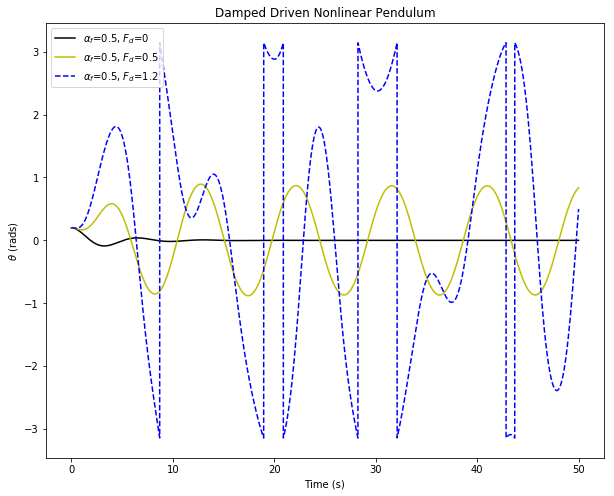

In [15]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 50 #s
    interval = (a, b)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = [0.5] #N/kgs
    F_d = [0, 0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (alpha_f)):
        for j in range (len (F_d)):
            
            #solve for the oscillator values
            solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                           l, alpha_f[i], F_d[j], omega_d, order = 4)
            
            #ensure solution values are between -pi and pi
            solution = oscillatorDomain (solution)
            
            #plot the current solution
            ax.plot (solution[:,0], solution[:,2], styles[count], label = r"$\alpha_f$={}, "
                     "$F_d$={}".format (alpha_f[i], F_d[j]))
            
            #increment count for the graph style
            count += 1
            
    plt.legend()
    plt.show()

**Figure 1**

*
This figure shows the angle of displacement for a damped driven nonlinear pendulum with a friction coefficient of 0.5 N/kg. The $\theta$-axis shows the angle of displacement, the range is from -4 to 4 radians. The time-axis shows the time elapsed and ranges from 0 to 60 seconds. There are three lines. The lines are solid-black, solid-yellow, and dashed-blue, which correspond with a driving coefficient of 0, 0.5, and 1.2 N/kg. The line for $F_d = 0$ N/kg begins by oscillating, but the magnitude decays rapidly and is essentially zero by 15 seconds. This makes sense considering a pendulum with a frictional force and no driving force should lose energy and stop oscillating over time. The line for $F_d = 0.5$ N/kg oscillates with a fairly constant magnitude of approximately 1 radian. This corresponds with a pendulum that oscillates with the driving force. The line for $F_d = 1.2$ N/kg oscillates sporadically from $-\pi$ to $\pi$. The reason for this is that the driving force for this case is large enough that it easily overcomes the frictional force. This means that it is possible for the pendulum to make full $2\pi$ rotations. Although the graph has points that appear discontinuous the reason there are spikes in the graph is due to a remapping of the angle-value. Since any angle $\theta$ is equivalent to $\theta \pm 2\pi$, we mapped this graph to keep $\theta$ within the range of $-\pi$ to $\pi$, as is customary [2]. 
*



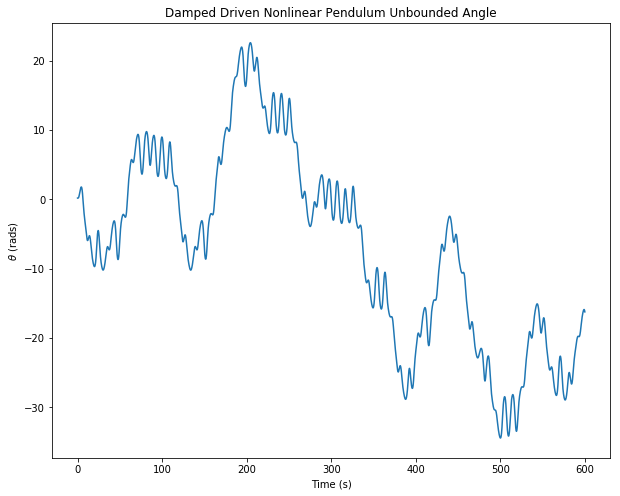

In [23]:
if "__main__" == __name__:
  
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = 10000000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kgs
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Unbounded Angle")
    
    #initialize style count to zero
    count = 0
    
    #solve for the oscillator values
    solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                   l, alpha_f, F_d, omega_d, order = 4)

    #plot the current solution
    ax.plot (solution[:,0], solution[:,2])
            
    plt.show()

**Figure 2**

*
This figure shows the angle from the initial vertical of a pendulum where the angle is not remapped to be between $-\pi$ and $\pi$. The time-axis ranges from 0 to 600 seconds and the $\theta$-axis ranges from -30 to 20 radians. The graphed line is shown in blue and changes rapidly from increasing to decreasing with no continued pattern to the motion. This graph helps to show that even over an extended period of time the motion of the pendulum does not fall into a pattern. The angle of the pendulum was not remapped to be between $-\pi$ and $\pi$ to show that the remapping did not prevent a pattern of the motion from showing up.
*

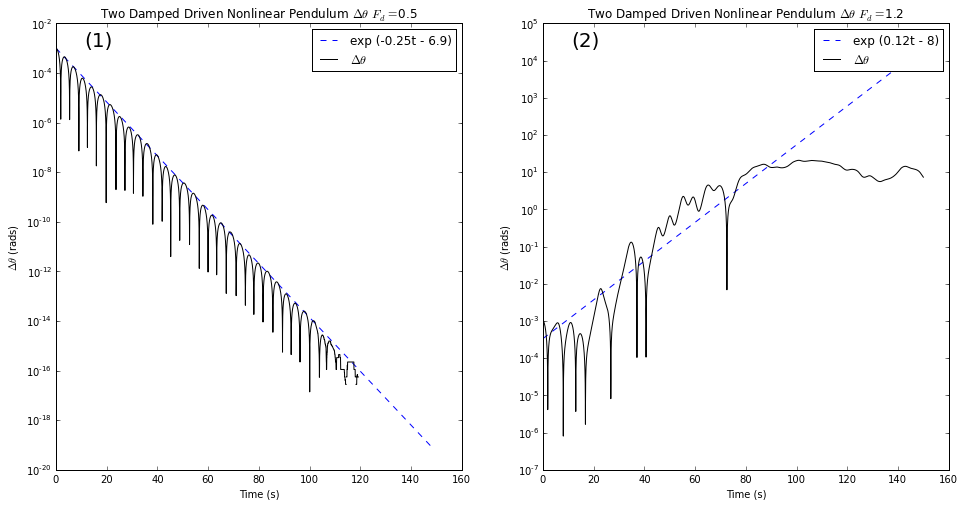

In [27]:
if "__main__" == __name__:
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20

    #set Runge-Kutta argument values
    interval = (0, 150)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/s^2
    l = 9.8 #m
    alpha_f = 0.5 #N/kg
    F_d = [0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)

    #set intial Lyapunov exponent values
    xValues = np.arange (interval[0], interval[1])
    alpha = [-0.25, 0.12]
    beta = [6.9, 8]
    
    plt.figure(figsize=(16, 8))
        
    for i in range (len (F_d)):
        
        #set Lyapunov exponent for pendulum
        yValues = []
        for x in xValues:
            yValues.append (np.exp (alpha[i] * x - beta[i]))

        #solve pendulum values for starting conditions differing by only 0.001 radians
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d, order = 4)
        
        #add 0.001 radian starting difference and calculate new data points
        r0 = (r0[0], r0[1] + 0.001)
        solution2 = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d, order = 4)

        #create set with the solution's differences
        diff = solution2 - solution

        #set up plot
        ax = plt.subplot(1, 2, i + 1)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel(r"$\Delta\theta$ (rads)")
        ax.set_title (r"Two Damped Driven Nonlinear Pendulum $\Delta\theta$ $F_d=${}".format (F_d[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "(" + str (i + 1) + ")", fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
        #plot the difference in theta and the Lyapunov exponent solution
        plt.semilogy (xValues, yValues, "--b", label = "exp ({}t - {})".format (alpha[i], beta[i]))
        plt.semilogy(solution[:,0], abs(diff[:,2]), "-k", label = r"$\Delta\theta$")
  
        plt.legend()
    
    plt.show ()

**Figure 3**

*
These plots show the difference in the angular position of two pendulums that start with an initial angular difference of $\theta = 0.001$ radians. Both plots are semilog plots, where the $\Delta\theta$-axis is log base 10. Subplot (1) is for the case of $F_d = 0.5$ N/kg. The $\Delta\theta$-axis ranges from $10^{-20}$ to $10^{-2}$ radians. The time-axis ranges from 0 to 160 seconds. There are two lines, the solid-black line is for the $\Delta\theta$-value while the dashed-blue line is for an exponential decay function. The $\Delta\theta$ line has sharp dips in between small rounded peaks. The overall trend of the peaks is modeled by the exponential function $e^{-0.25t - 6.9}$. The sudden dips correspond to the cases that the pendulums change directions, which means that the difference between the angles will be zero for a single instance. As a result of this it makes sense to focus on the overall trend of the $\Delta\theta$ function, shown with the exponential function. Subplot (2) is for the case $F_d = 1.2$ N/kg. The $\Delta\theta$-axis ranges from $10^{-7}$ to $10^{5}$ radians. The time-axis also ranges from 0 to 160 seconds. The solid-black line shows the $\Delta\theta$-value for the pendulums and the dashed-blue line shows an exponential function. The $\Delta\theta$ line, like the one in subplot (1), has sharp dips, but the overall trend is increasing. The overall trend is approximately given by $e^{0.12t - 8}$, which is the function for the dashed-blue line.
*



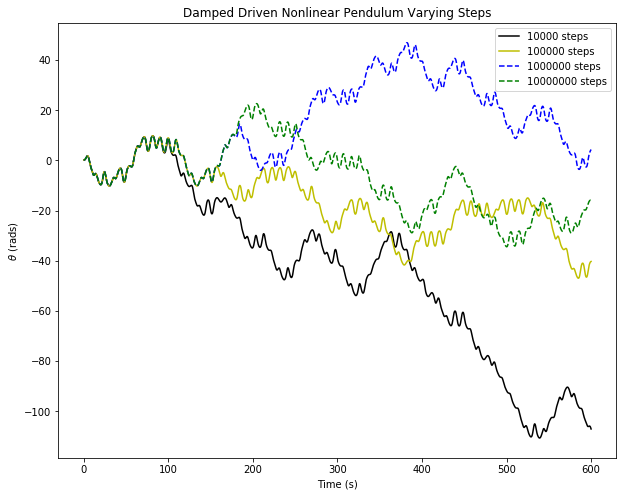

In [6]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = [10000, 100000, 1000000, 10000000]
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kgs
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Varying Steps")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (steps)):

        #solve for the oscillator values
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps[i], g, 
                       l, alpha_f, F_d, omega_d, order = 4)

        #plot the current solution
        ax.plot (solution[:,0], solution[:,2], styles[count], label = "{} steps".format (steps[i]))

        #increment count for the graph style
        count += 1
            
    plt.legend()
    plt.show()

**Figure 4**

*
This figure shows how drastically different the motion of the pendulum changes based upon small variations caused by differing the step size used for the calculation. The time-axis ranges from 0 to 600 seconds. The $\theta$-axis ranges from -100 radians to 40 radians. There are four lines, one for each of the time steps 10,000, 100,000, 1,000,000, and 10,000,000 steps, which are shown by lines that are solid-black, solid-yellow, dashed-blue, and dashed-green respectively. All four lines change direction frequently and throughout the entire interval. All four lines overlap until just after 100 seconds. After 100 seconds the 10,000 step line no longer overlaps with the others. The other three all overlap until about 175 seconds, where the 100,000 step line diverges from the other two. The lines for 1,000,000 and 10,000,000 steps overlap until right around 190 seconds at which point they diverge from each other. After 190 seconds none of the lines share a similar pattern or very similar values for long.
*



**Results Continued**


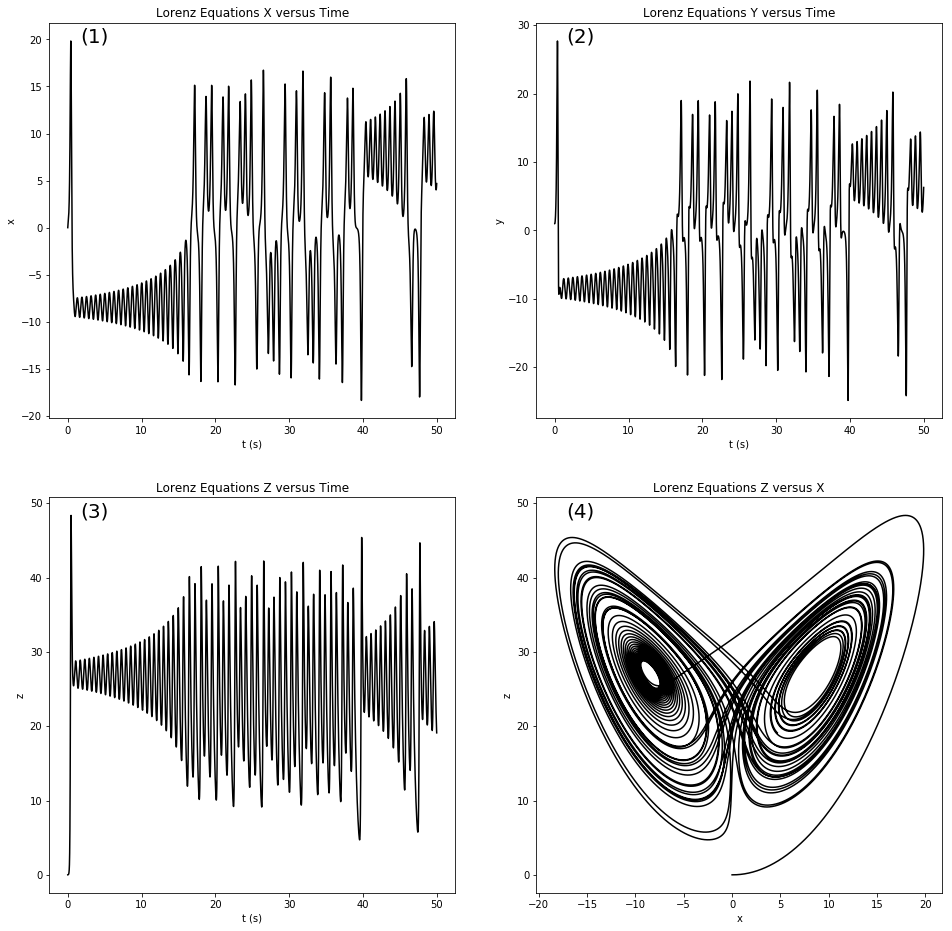

In [30]:
if __name__ == "__main__":
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20
    
    #set constants and starting condition
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0, 1, 0)
    
    #set solution interval and accuracy
    interval = (0, 50)
    steps = 1000000
    
    #solve Lorenz equations
    solution = lorenzSolution (r0, interval, steps, state)
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    # x vs time
    ax = plt.subplot(221)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("x")
    ax.set_title ("Lorenz Equations X versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(1)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,1], "-k")
    
    # y vs time
    ax = plt.subplot(222)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("y")
    ax.set_title ("Lorenz Equations Y versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(2)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,2], "-k")
    
    # z vs time
    ax = plt.subplot(223)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("z")
    ax.set_title ("Lorenz Equations Z versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(3)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,3], "-k")
    
    # x vs z
    ax = plt.subplot(224)
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title ("Lorenz Equations Z versus X")
    ax.text (plotLabelXPos, plotLabelYPos, "(4)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,1], solution[:,3], "-k")
    
    plt.show ()

    

**Figure 5**

*
This figure shows the solution to the Lorenz equations for the values $\sigma$ = 10, $\rho$ = 28, and $\beta$ = 8/3. There are four subplots to this figure. Subplots (1), (2), and (3) graph the values of x, y, and z, respectively, versus time. The time-axis for each of these ranges from 0 to 50 seconds. In subplot (1) the x-axis ranges from -20 to 20. In subplot (2) the y-axis ranges from -20 to 30. In subplot (3) the z-axis ranges from 0 to 50. In all three of these plots the graph oscillates rapidly for the first 15 seconds with an increasing amplitude over time. After around 15 seconds the plots take on different shapes from each other. The first and second plots appear similar due to there being an overlap in the position and shape of the major peaks and dips in both plots, but the regions between these larger extremas have varying amounts of smaller peaks and dips. The third plot primarily oscillates around z = 28. The fourth subplot shows z versus x. The x-axis ranges from -20 to 20 while the z-axis ranges from 0 to 50. In this graph there are two  ring like shapes (known as attractors) on either side of the line x = 0. The line of the graph circles these attractors many times creating an almost butterfly looking shape.
*

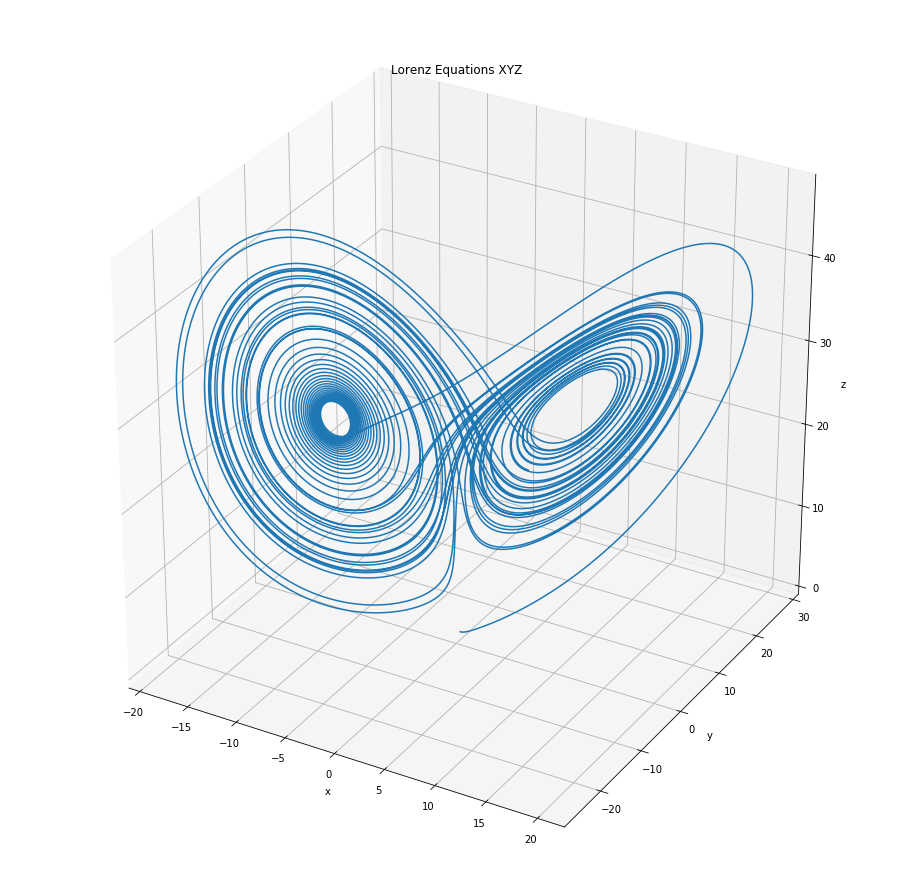

In [31]:

if __name__ == "__main__":
    #set constants and starting condition
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0, 1, 0)
    
    #set solution interval and accuracy
    interval = (0, 50)
    steps = 1000000
    
    #solve Lorenz equations
    solution = lorenzSolution (r0, interval, steps, state)

    #plot the figure
    fig =  plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.set_xlabel ("x")
    ax.set_ylabel ("y")
    ax.set_zlabel ("z")
    ax.set_title ("Lorenz Equations XYZ")
    ax.plot(solution[:,1], solution[:,2], solution[:,3])
    plt.show()

**Figure 6**

*
This figure shows the solution to the Lorenz equations for $\sigma$ = 10, $\rho$ = 28, and $\beta$ = 8/3, where x, y, and z are plotted against each other. The x-axis ranges from -20 to 20, the y-axis ranges from -20 to 30, and the z-axis ranges from 0 to 40. The line of the graph is shown in blue. There are two attractors in the figure that are made up of many circles that spiral around to fixed points. 
*


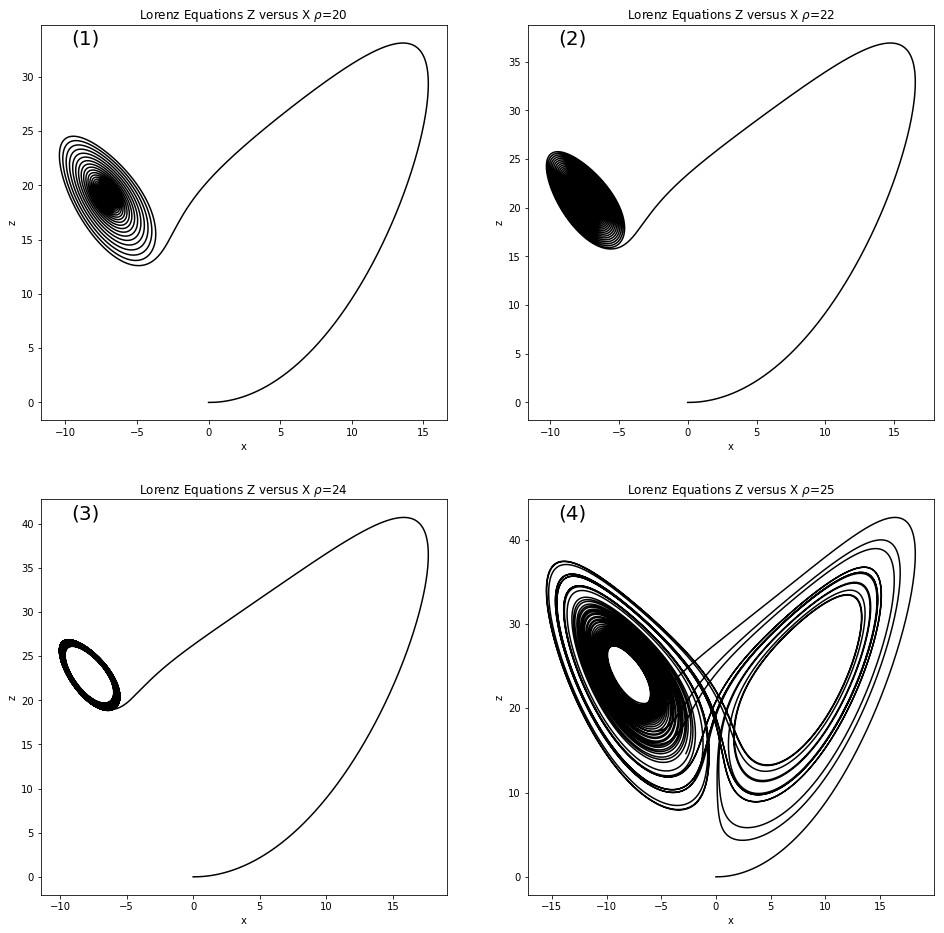

In [3]:
if __name__ == "__main__":
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20
    
    #set constants and starting condition
    sigma = 10.0
    rho = [20, 22, 24, 25]
    beta = 8.0 / 3.0
    r0 = (0, 1, 0)
    
    #set solution interval and accuracy
    interval = (0, 50)
    steps = 100000
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    #plot the figure for each rho value
    for i in range (len (rho)):
        
        #set the state based on the current rho value
        state = (sigma, rho[i], beta)

        #solve the Lorenz equations
        solution = lorenzSolution (r0, interval, steps, state)

        # x vs z
        ax = plt.subplot(2, 2, i + 1)
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.set_title (r"Lorenz Equations Z versus X $\rho$={}".format (rho[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "({})".format(i + 1), fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
        plt.plot(solution[:,1], solution[:,3], "-k")

    
    plt.show ()


**Figure 7**

*
This figure shows the solution to the Lorenz equations for $\sigma$ = 10, $\beta$ = 8/3, and varying values of $\rho$. The values of $\rho$ that are used are 20, 22, 24, and 25. In subplots (1), (2), and (3) there is a large arch that extends to the left side of the x = 0 which starts from x = z = 0. For the first three subplots this arch then returns back to the left side of x = 0 and produces a spiral shape. In the fourth subplot there are two spiral shapes; the left spiral is darker owing to there being more loops in it, while the one to the right of x = 0 has only around 10 lines that make it up. The first three subplots are nonchaotic solutions to the Lorenz equations, while the fourth subplot is. These can be shown to be nonchaotic/chaotic by the $\rho$ values being less than or greater than 24.7.
*

In [ ]:
if __name__ == "__main__":
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20
    
    #set constants and starting condition
    sigma = 10.0
    rho = [20, 24.7368421052631579, 28]
    beta = 8.0 / 3.0
    r0 = (0, 1, 0)
    
    #set solution interval and accuracy
    interval = (0, 400)#(0, 50)
    steps = 4000000#100000
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    #plot the figure for each rho value
    for i in range (len (rho)):
        
        #set the state based on the current rho value
        state = (sigma, rho[i], beta)

        #solve the Lorenz equations
        solution = lorenzSolution (r0, interval, steps, state)

        # x vs z
        ax = plt.subplot(2, 2, i + 1)
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.set_title (r"Lorenz Equations Z versus X Long Exposure $\rho$={}".format (rho[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "({})".format(i + 1), fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
        plt.plot(solution[:,1], solution[:,3], "-k")

    
    plt.show ()


## Analysis <a id='an'></a>

*Figure 1* shows the angular displacement of three pendulums allowed to evolve for 50 seconds. For the case of the driving coefficient being 0 N/kg (shown in black) the pendulum comes to rest within a few oscillations, owing to the frictional force removing energy from the system. When $F_d$ is 0.5 N/kg (shown in yellow) the pendulum regularly oscillates with the same magnitude. The final case, shown in *figure 1*, is for $F_d$ = 1.2 N/kg (shown in blue). In this case the driving force is large enough to cause the pendulum to swing in a full circle. The seemingly discontinuous points on the graph are the result of adding or subtracting $2\pi$ to the angle of the pendulum in order to keep the range between $-\pi$ and $\pi$. 

The simplicity of the 0 N/kg line help to verify the that my equations and Runge-Kutta method are correct. This is because the results in *figure 1* are the type of results I would expect to find. The case where $F_d$ = 0 has a few oscillations at the beginning of the time period that decrease in magnitude, which is exactly what I would expect from a damped oscillator. As the pendulum swings a frictional force provides a resistance to the pendulum's motion which decreases the pendulum's overall energy and eventually causes it to stop moving all together. These figures are also verified by Giordano, who modeled the same situation using a modified version of the Euler method. 


The line for $F_d$ = 1.2 N/kg is far different from the other two lines. The first two driving forces cause a pendulum to have fairly simple motion, one oscillates with a decreasing amplitude and the other oscillates with a constant amplitude (after a short period at the beginning). For the larger driving force the pendulum's motion fails to fall into a pattern or normal oscillatory motion. *Figure 2* helps to show that this is not a result of the fact I corrected the pendulum's angle to be between $-\pi$ and $\pi$, nor due to the constraint of the time limit. This case is known as chaotic. The reason for this is that this case is both deterministic and unpredictable. By deterministic I mean I can calculate the angle at any given time given the initial parameters. *Figure 3* helps to show what is meant by unpredictable.


*Figure 3* shows the difference in the angle ($\Delta\theta$) of two pendulums started with an angle difference of 0.001 radians. In subplot 1 the driving coefficient is 0.5 N/kg, the same value that created the constant oscillating function in *figure 1*. As shown in the *figure 3*, $\Delta\theta$ decreases overtime for this low driving force case. This trend continues as more time elapses and is only cut short by rounding error. As a result of $\Delta\theta$ converging to zero, the two pendulums must be converging to having the same state of motion at the same time. This means that given the starting conditions of one of the pendulums I could predict the position of the other pendulum, which means that this motion is predictable. 

*Figure 3* subplot 2 shows the case for the driving coefficient of 1.2 N/kg. The difference in the angle between the two pendulum increases with time. As seen in the plot, the angle difference increased rapidly for a small amount of time and levels off near $2\pi$ (because this is the maximum $\Delta\theta$ possible). Despite these pendulums being started at similar states their behaviours diverge rapidly. This means that even with a complete solution to one of the pendulum's motion I would be unable to predict the other pendulum's motion. This is what is meant by unpredictable.

The dashed lines in each plot in *figure 3* corresponds to the approximate trend of $\Delta\theta$. This trend is approximately $\log (\Delta\theta) \approx \lambda t$. Solving this for $\Delta\theta$ gives the relation $\Delta\theta \approx e^{\lambda t}$, where $\lambda$ is known as the Lyapunov exponent [2]. As seen in *figure 3* $\lambda$ was negative when $\Delta\theta$ converged while $\lambda$ was positive when $\Delta\theta$ diverged. This is a property of the Lyapunov exponent: $-\lambda$ values correspond to nonchaotic systems while $+\lambda$ values correspond to chaotic systems, and the transition occurs at $\lambda$ = 0 [2].


*Figure 4* shows how sensitive chaotic systems can be to small approximations. This figure shows several solutions to the pendulum problem where the step size is varied. For small time values the variation in the angular displacement is not significant enough to notice, but by 200 seconds the angles are completely different for all four lines. This graph does not constrict the angle to be between $-\pi$ and $\pi$ to emphasis that the path taken by the pendulum in all four cases is different overall.

This figure also helps to show the limitations of the Runge-Kutta method. Even with 1 million steps (or 1,667 steps per second) I was only able to obtain about 190 seconds of data that overlapped with 10 million steps. Due to the chaotic nature  of this problem, and the lack of an analytical solution to equation 1 [2], I have 


## Summary <a id='sum'></a>

## References <a id='refs'></a>

[1] Newman  
[2] Giordano  
[3] Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD  
[4] Weisstein, Eric W. "Lorenz Attractor." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/LorenzAttractor.html

### [Back to top](#TableOfContents)